In [1]:
# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

In [2]:
# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

In [3]:
print(tf.__version__)

2.2.0


In [4]:
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [5]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [6]:
train_images.shape

(60000, 28, 28)

In [21]:
len(train_labels)

60000

In [20]:
test_images.shape

(10000, 28, 28)

In [22]:
len(test_labels)

10000

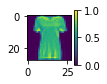

In [33]:
#plt.figure()
plt.figure(figsize=(1,1))
plt.imshow(train_images[10])
plt.colorbar()
plt.grid(False)
plt.show()

In [28]:
train_images = train_images / 255.0

test_images = test_images / 255.0

In [30]:
test_images.shape

(10000, 28, 28)

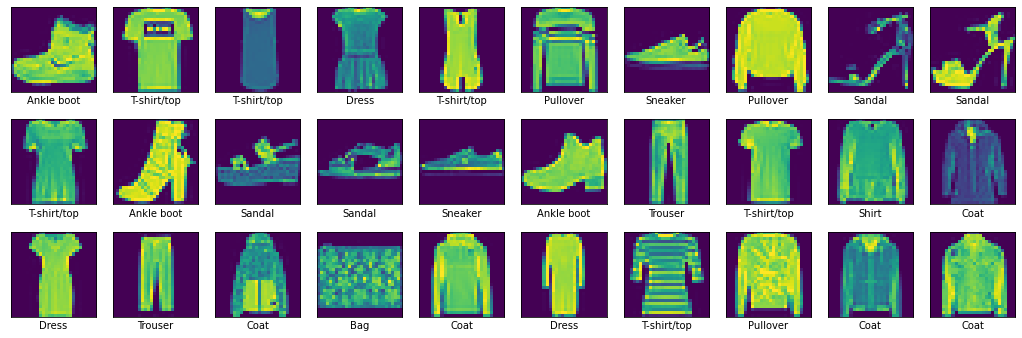

In [147]:
plt.figure(figsize=(18,10))
for i in range(30):
    plt.subplot(5,10,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [43]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10)
])

In [44]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [45]:
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 1s 644us/step - loss: 0.5024 - accuracy: 0.8222
Epoch 2/10
1875/1875 [==============================] - 1s 673us/step - loss: 0.3770 - accuracy: 0.8634
Epoch 3/10
1875/1875 [==============================] - 1s 633us/step - loss: 0.3383 - accuracy: 0.8754
Epoch 4/10
1875/1875 [==============================] - 1s 644us/step - loss: 0.3126 - accuracy: 0.8836
Epoch 5/10
1875/1875 [==============================] - 1s 665us/step - loss: 0.2961 - accuracy: 0.8916
Epoch 6/10
1875/1875 [==============================] - 1s 634us/step - loss: 0.2809 - accuracy: 0.8960
Epoch 7/10
1875/1875 [==============================] - 1s 635us/step - loss: 0.2699 - accuracy: 0.8995
Epoch 8/10
1875/1875 [==============================] - 1s 636us/step - loss: 0.2582 - accuracy: 0.9034
Epoch 9/10
1875/1875 [==============================] - 1s 652us/step - loss: 0.2485 - accuracy: 0.9068
Epoch 10/10
1875/1875 [==============================] - 1s 651u

In [46]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 0s - loss: 0.3351 - accuracy: 0.8830

Test accuracy: 0.8830000162124634


In [47]:
probability_model = tf.keras.Sequential([model, 
                                         tf.keras.layers.Softmax()])

In [48]:
predictions = probability_model.predict(test_images)

In [49]:
predictions[0]

array([1.5038135e-07, 7.0367975e-11, 6.9251427e-10, 4.5427564e-13,
       6.9855068e-09, 6.2707989e-03, 9.4393066e-08, 5.0114077e-03,
       3.8590901e-08, 9.8871756e-01], dtype=float32)

In [50]:
np.argmax(predictions[0])

9

In [51]:
test_labels[0]

9

In [52]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

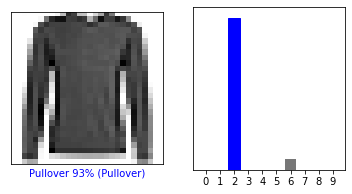

In [56]:
i = 55
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

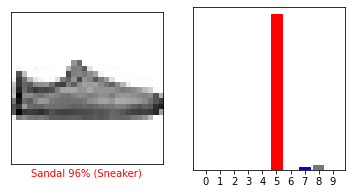

In [57]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

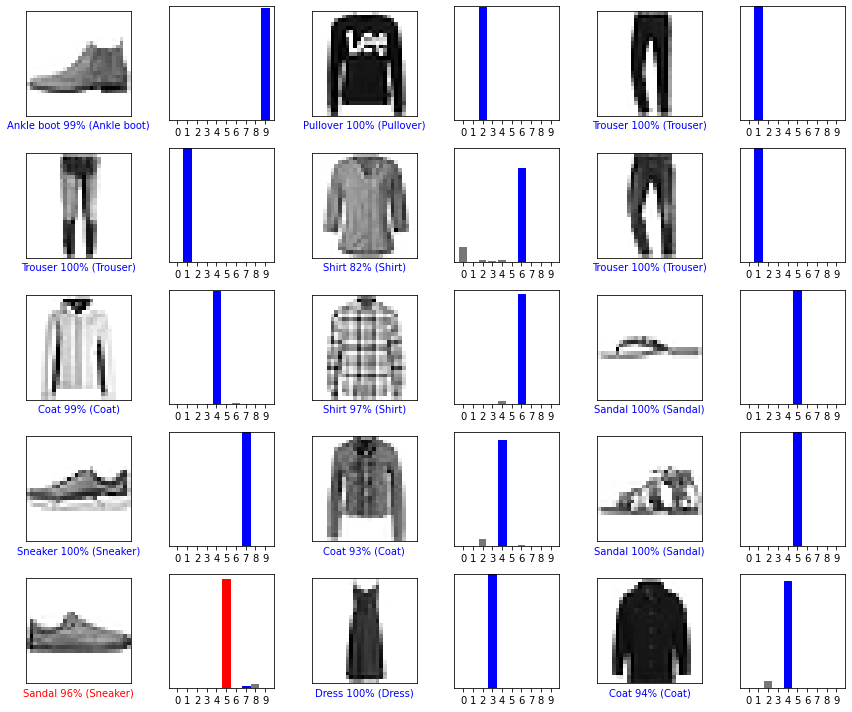

In [58]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

In [123]:
# Grab an image from the test dataset.
img = test_images[1]

print(img.shape)

(28, 28)


In [124]:
# Add the image to a batch where it's the only member.
img = (np.expand_dims(img,0))
print(img.shape)

(1, 28, 28)


In [61]:
predictions_single = probability_model.predict(img)

print(predictions_single)

[[1.5508283e-05 6.5860867e-10 9.9642485e-01 2.9448750e-09 3.0379836e-03
  2.0953198e-12 5.2173284e-04 2.0235441e-21 1.6366611e-09 2.2445028e-14]]


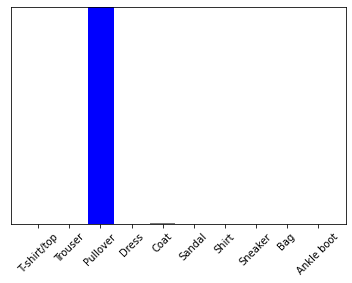

In [62]:
plot_value_array(1, predictions_single[0], test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)

In [63]:
np.argmax(predictions_single[0])

2

In [134]:
import os

path = './predict_images'

files = os.listdir(path)

for f in files:
    print(f)

Shirt7.jpg
Sandal7.jpeg
Trouser6.jpg
Coat4.jpg
Coat1.jpg
Coat3.jpg
Coat2.jpg
Trouser3.jpg
Coat7.jpeg
Sandal5.jpeg
Trouser2.jpg
Sandal3.jpg
Shirt6.jpg
Shirt3.jpg
Sandal1.jpeg
Bag1.jpg
Sandal6.jpeg
Sneaker4.jpg
Trouser1.jpg
Shirt2.jpeg
Trouser7.jpg
Shirt4.jpg
Shirt1.jpeg
Sandal9.jpg
Sandal4.jpeg
Ankle boot2.jpg
Shirt9.jpg
Shirt8.jpeg
Sandal2.jpg
Sandal8.jpg
Sneaker3.jpg
Coat5.jpeg
Trouser4.jpg
Shirt5.jpg
Sneaker5.jpg
Coat8.jpg
Coat6.jpg
Ankle boot1.jpg
Trouser8.jpg
Trouser5.jpg
Coat9.jpg
Sneaker2.jpg


In [78]:
print(type(train_images))

<class 'numpy.ndarray'>


In [100]:
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array

In [153]:
# load the image

collected_image_data = []
true_lebel_data = []
for f in files:
    img = load_img('./predict_images/'+f, grayscale=False, color_mode='rgb', target_size=(28,28))
    # convert to numpy array
    img_array = img_to_array(img)

    img_array1 = img_array[:,:,0]
    #print(img_array1)
    img_array1 = img_array1/255
    collected_image_data.append(img_array1)
    if (f.find("Ankle boot") != -1):
        true_lebel_data.append(9)
    if (f.find("Bag") != -1):
        true_lebel_data.append(8)
    if (f.find("Sneaker") != -1):
        true_lebel_data.append(7)
    if (f.find("Shirt") != -1):
        true_lebel_data.append(6)
    if (f.find("Sandal") != -1):
        true_lebel_data.append(5)
    if (f.find("Coat") != -1):
        true_lebel_data.append(4)
    if (f.find("Trouser") != -1):
        true_lebel_data.append(1)
#X_data.append(img_array1)
all_images = np.array(collected_image_data)
#print(all_images.shape)
#print(len(all_images))


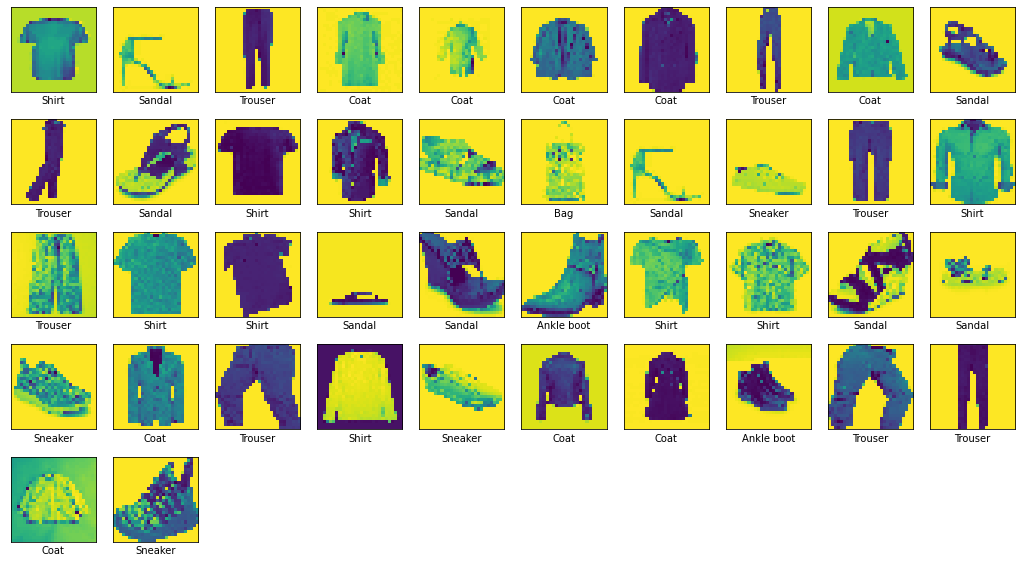

In [154]:
num_rows = len(all_images)
plt.figure(figsize=(18,10))
for i in range(num_rows):
    plt.subplot(5,10,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(all_images[i])
    plt.xlabel(class_names[true_lebel_data[i]])
plt.show()

In [157]:
own_predictions = probability_model.predict(all_images)


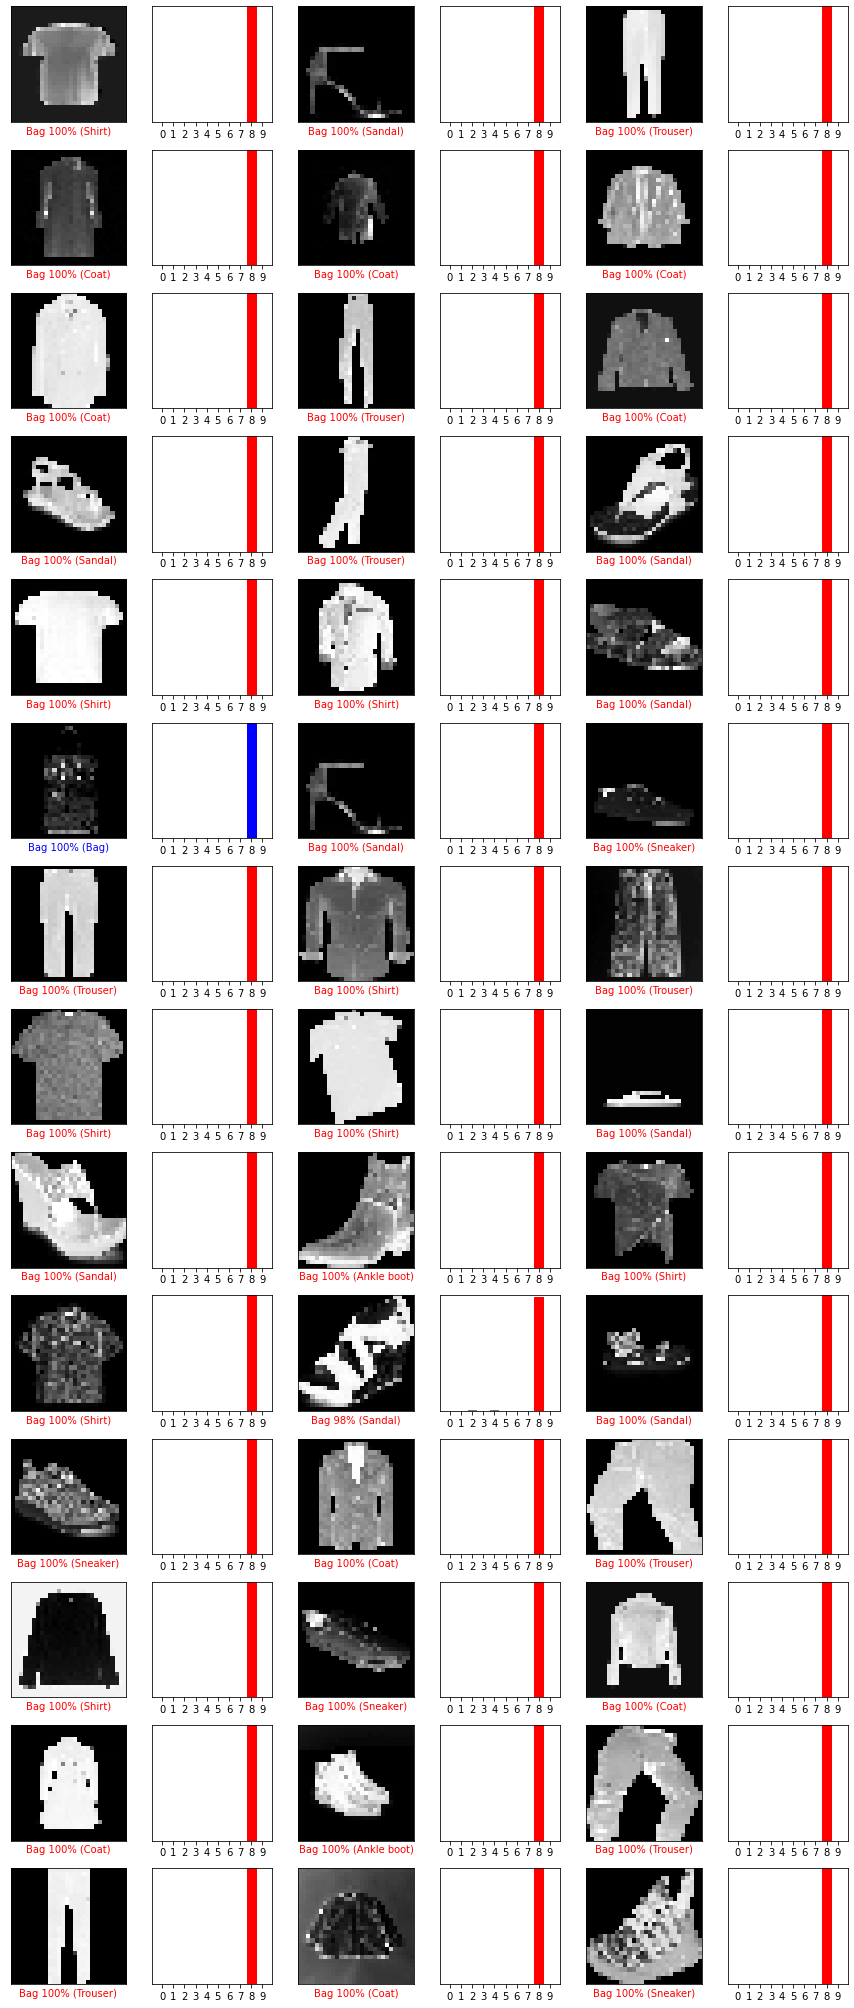

In [158]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 14
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, own_predictions[i], true_lebel_data, all_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, own_predictions[i], true_lebel_data)
plt.tight_layout()
plt.show()